In [214]:
%matplotlib inline
import sklearn
import numpy as np
import matplotlib
import pandas as pd
import numpy as np
from sklearn import cross_validation
from sklearn import datasets
from sklearn import preprocessing

from sklearn import model_selection

In [215]:
df = pd.read_csv("train.csv")

In [47]:
X_train, X_test, y_train, y_test = cross_validation.train_test_split(df.ix[:,1:],df.ix[:,0] , test_size=0.2, random_state=1)

In [216]:
from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler()  
scaler.fit(X_train)  
X_train = scaler.transform(X_train)  
X_test = scaler.transform(X_test)  

X_total = scaler.transform(df.ix[:,1:])  




In [49]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(algorithm='l-bfgs', alpha=1e-5, hidden_layer_sizes=(5, 2))
clf

MLPClassifier(activation='relu', algorithm='l-bfgs', alpha=1e-05,
       batch_size=200, beta_1=0.9, beta_2=0.999, early_stopping=False,
       epsilon=1e-08, hidden_layer_sizes=(5, 2), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [235]:
#import pickle
#pickle.dump( tester3.grid_scores_, open( "save.p", "wb" ) )
testv = pickle.load( open( "save.p", "rb" ) )

In [237]:
#clf = tester3.best_estimator_
testv


[mean: 0.90539, std: 0.00408, params: {'alpha': 0.10000000000000001, 'hidden_layer_sizes': (10, 5)},
 mean: 0.92839, std: 0.00319, params: {'alpha': 0.10000000000000001, 'hidden_layer_sizes': (30, 5)},
 mean: 0.94250, std: 0.00269, params: {'alpha': 0.10000000000000001, 'hidden_layer_sizes': (50, 5)},
 mean: 0.94036, std: 0.00333, params: {'alpha': 0.10000000000000001, 'hidden_layer_sizes': (60, 5)},
 mean: 0.89875, std: 0.00425, params: {'alpha': 0.01, 'hidden_layer_sizes': (10, 5)},
 mean: 0.92765, std: 0.00330, params: {'alpha': 0.01, 'hidden_layer_sizes': (30, 5)},
 mean: 0.93625, std: 0.00689, params: {'alpha': 0.01, 'hidden_layer_sizes': (50, 5)},
 mean: 0.94140, std: 0.00350, params: {'alpha': 0.01, 'hidden_layer_sizes': (60, 5)},
 mean: 0.90979, std: 0.00684, params: {'alpha': 0.001, 'hidden_layer_sizes': (10, 5)},
 mean: 0.92872, std: 0.00627, params: {'alpha': 0.001, 'hidden_layer_sizes': (30, 5)},
 mean: 0.94214, std: 0.00301, params: {'alpha': 0.001, 'hidden_layer_sizes': (

In [218]:
alpha = 0.001
hidden_layer_sizes = (60,5)
clf = MLPClassifier(algorithm='l-bfgs', alpha=alpha, hidden_layer_sizes=hidden_layer_sizes)



In [233]:
from sklearn.learning_curve import learning_curve

train_sizes, train_scores, test_scores = learning_curve(clf, X_train, y_train, train_sizes = np.linspace(.1,.99, num = 10), cv=5)


In [232]:
np.linspace(.1,.99, num = 10)

array([ 0.1       ,  0.19888889,  0.29777778,  0.39666667,  0.49555556,
        0.59444444,  0.69333333,  0.79222222,  0.89111111,  0.99      ])

In [238]:
def plotter(train_scores,test_scores,train_sizes,xlabel,ylabel,title):
    #plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,train_scores_mean + train_scores_std, alpha=0.1,color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",label="Testing score")
    plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
    plt.title(title)
    plt.show()

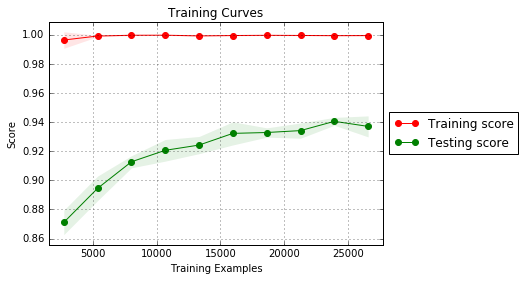

In [239]:
import matplotlib.pyplot as plt

plotter(train_scores,test_scores,train_sizes,"Training Examples", "Score", "Training Curves");

We can see from this plot that the amount of 

In [ ]:
from sklearn.learning_curve import validation_curve
train_scores_val, test_scores_val = validation_curve(clf, X_train,y_train, param_name="alpha", param_range=10.0 ** -np.arange(1, 7), cv = 5,scoring="accuracy")


ValueError: Argument dimensions are incompatible

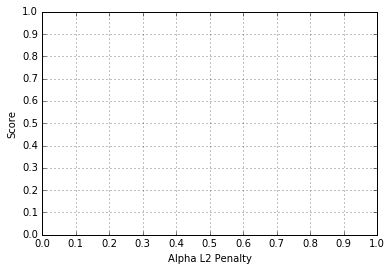

In [241]:
plotter(train_scores_val,test_scores_val,10.0 ** -np.arange(1, 7),"Alpha L2 Penalty", "Score", "Validation Curves using 5 Kfold");

What we can see from the 